0.01591549430918953
[[7.88418743e+09 7.88418743e+09]
 [7.88418743e+09 7.88418743e+09]]
125480740.24758445


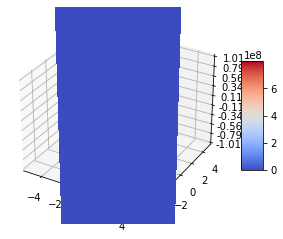

(40, 40)
(40, 40)
[[1.47148487e+09 1.25480740e+08 1.21402610e+07 ... 1.33262713e+06
  1.21402610e+07 1.25480740e+08]
 [1.47148487e+09 1.25480740e+08 1.21402610e+07 ... 1.33262713e+06
  1.21402610e+07 1.25480740e+08]
 [1.47148487e+09 1.25480740e+08 1.21402610e+07 ... 1.33262713e+06
  1.21402610e+07 1.25480740e+08]
 ...
 [1.47148487e+09 1.25480740e+08 1.21402610e+07 ... 1.33262713e+06
  1.21402610e+07 1.25480740e+08]
 [1.47148487e+09 1.25480740e+08 1.21402610e+07 ... 1.33262713e+06
  1.21402610e+07 1.25480740e+08]
 [1.47148487e+09 1.25480740e+08 1.21402610e+07 ... 1.33262713e+06
  1.21402610e+07 1.25480740e+08]]


In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

def kernel_function(h,obs,valueG):
    '''
    Parameters
    ----------
         obs: Observation data
         h: windows size
         d: dimension of the windows size
         valueG: Gaussian value
    
    Returns
    -------
      the k value   
    '''
    result = 1
    #print(obs)
    for j in range(len(h)):
        result *= np.exp(-(valueG-obs[0][j])/(2*h[j]**2))
    return result

def kernel_density_function(obs_data,h,gaussianData):
    '''
    Parameters
    ----------
    
    Returns
    -------
      out: ndarray
      Density
    '''
    dimension = len(h)
    sizeObs = len(obs_data)
    coef = 1/(sizeObs * np.prod(h) * (np.sqrt(2*np.pi)**dimension))
    result = []
    for obs in obs_data:
      k_result = 0
      for g in gaussianData:
        k_result += coef * kernel_function(h,obs,g)
      result.append(k_result)
    return result

    
def generate():
  data = []
  for i in np.arange(-5,5,0.1):
    for j in np.arange(-5,5,0.1):
      data.append([i,j])
  return data


windows_size = [.5,.005]

X = np.arange(-5,5,0.25)
Y = np.arange(-5,5,0.25)
X,Y = np.meshgrid(X,Y)

obs_data = np.array(generate())

reference_dist_values = np.zeros((len(X),len(X)))

mean = np.array([[0],[0]])
y = np.array([[1],[1]])
cov = np.array([[1, 0],[0, 100]])
#gaussian_data = np.random.multivariate_normal(mean, cov, 2000)
#print(X[0][99])

for i in range(0,len(X)):
  for j in range(0,len(X)):
    y = np.array([X[i][j],Y[i][j]])
    result1 = np.dot((np.transpose(y-mean)),(np.linalg.inv(cov)))
    result = np.dot(result1, (y - mean))
    coef = 1/(np.sqrt( ((2*np.pi)**2) * np.linalg.det(cov) ) )
    reference_value = coef * np.exp(result)
    reference_dist_values[i][j] = reference_value[0][0]

print(coef)
print(np.exp(result))
print(reference_value[0][0])
#print(reference_dist_values)
""" estimation_data = kernel_density_function(obs_data,windows_size,gaussian_data)
"""
fig = plt.figure()

# 指定图形类型是 3d 类型
ax = fig.add_subplot(projection='3d')
# Plot the surface.
surf = ax.plot_surface(X, Y, reference_dist_values, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

""" fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(X,Y,reference_dist_values) """
print(X.shape)
print(Y.shape)
#print(reference_dist_values)


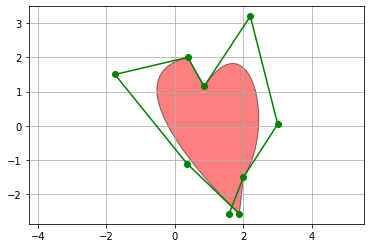

In [2]:
""" 实战！Python 30 行代码画各种 3D 图形

派森酱1 简说Python 2020-06-13

￼￼

文 | 潮汐

来源：Python 技术「ID: pythonall」

￼

在之前的文章有讲解过 Matplotlib 的用法，可能有的小伙伴们已经略有忘记，如果有不熟悉的读者朋友们请回顾Matplotlib学习进阶 ，今天文章教大家如何用不到 30 
行代码绘制 Matplotlib 3D 图形，Matplotlib 绘制的都是平面 3D 图形，接下来上才艺！

回顾 2D 作图

用赛贝尔曲线作 2d 图。此图是用基于 Matplotlib 的 Path 通过赛贝尔曲线实现的，有对赛贝尔曲线感兴趣的朋友们可以去学习学习，
在 matplotlib 中，figure 为画布，axes 为绘图区，fig.add_subplot()、plt.subplot() 方法均可以创建子图。以下是作图实践。
 """
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
#定义绘图指令与控制点坐标
Path = mpath.Path
# Path 控制坐标点绘制贝塞尔曲线
# 图形数据构造

# MOVETO表示将绘制起点移动到指定坐标
# CURVE4表示使用4个控制点绘制3次贝塞尔曲线
# CURVE3表示使用3个控制点绘制2次贝塞尔曲线
# LINETO表示从当前位置绘制直线到指定位置
# CLOSEPOLY表示从当前位置绘制直线到指定位置，并闭合多边形
path_data = [
    (Path.MOVETO, (1.88, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 1.5)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -1.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes,verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)
# plot control points and connecting lines
x, y = zip(*path.vertices)
line, = ax.plot(x, y, 'go-')
ax.grid()
ax.axis('equal')
plt.show()


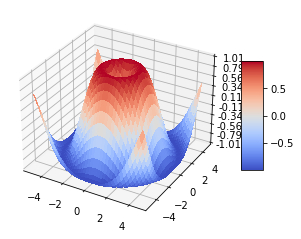

(40, 40)
(40, 40)
(40, 40)
(40, 40)


In [45]:
""" ￼心型效果图

3D 帽子图1

Matplotlib 绘制 3D 图形使用 mplot3d Toolkit 即 mplot3d 工具包，在 matplotlib 中使用 mplot3d 工具包。绘制 3D 图可以通过创建子图，
然后指定 projection 参数 为 3d 即可，返回的 ax 为 Axes3D 对象。mplot3d 官方学习文档

导入包： """

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

#绘图全过程：

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()

# 指定图形类型是 3d 类型
ax = fig.add_subplot(projection='3d')

# 构造数据
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

print(X.shape)
print(Y.shape)
print(R.shape)
print(Z.shape)


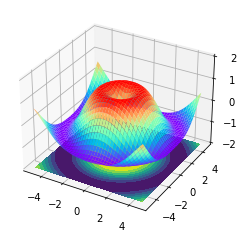

In [4]:
""" 呈现效果：

￼帽子图1

3D 帽子图2 """

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
# 指定图形类型为 3d 类型
ax = fig.add_subplot(111, projection='3d')
# X, Y value
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)

# 设置 x-y 平面的网格
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X ** 2 + Y ** 2)
# height value
Z = np.sin(R)

# rstride:行之间的跨度  cstride:列之间的跨度
# rcount:设置间隔个数，默认50个，ccount:列的间隔个数  不能与上面两个参数同时出现
#vmax和vmin  颜色的最大值和最小值
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('rainbow'))

# zdir : 'z' | 'x' | 'y' 表示把等高线图投射到哪个面
# offset : 表示等高线图投射到指定页面的某个刻度
ax.contourf(X,Y,Z,zdir='z',offset=-2)

# 设置图像z轴的显示范围，x、y轴设置方式相同
ax.set_zlim(-2,2)

plt.show()


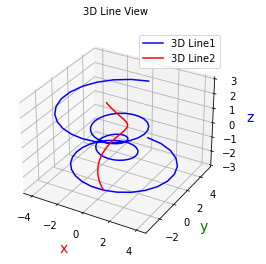

In [5]:
""" ￼帽子图2

3D 线性图

3D 线性图使用 Axes3D.plot来绘制 绘画的基本方法：Axes3D.plot(xs, ys[, zs, zdir='z', *args, **kwargs])

参数说明：

参数描述xs一维数组，点的 x 轴坐标ys一维数组，点的 y 轴坐标zs一维数组，可选项，点的 z 轴坐标zdir可选项，在 3D 轴上绘制 2D 数据时，
数据必须以 xs，ys 的形式传递，若此时将 zdir 设置为 ‘y’，数据将会被绘制到 x-z 轴平面上，默认为 ‘z’**kwargs其他关键字参数，
可选项，可参见 matplotlib.axes.Axes.plotimport numpy as np
 """
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 依次获取画布和绘图区并创建 Axes3D 对象
fig = plt.figure()
ax = fig.gca(projection='3d')

# 第一条3D线性图数据
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z1 = np.linspace(-2, 2, 100)
r = z1**2 + 1
x1 = r * np.sin(theta)
y1 = r * np.cos(theta)

# 第二条3D线性图数据
z2 = np.linspace(-3, 3, 100)
x2 = np.sin(z2)
y2 = np.cos(z2)

# 绘制3D线性图
ax.plot(x1, y1, z1, color='b', label='3D Line1')
ax.plot(x2, y2, z2, color='r', label='3D Line2')

# 设置标题、轴标签、图例，也可以直接使用 plt.title、plt.xlabel、plt.legend...
ax.set_title('3D Line View', pad=15, fontsize='10')
ax.set_xlabel('x ', color='r', fontsize='14')
ax.set_ylabel('y ', color='g', fontsize='14')
ax.set_zlabel('z ', color='b', fontsize='14')
ax.legend()
plt.show()


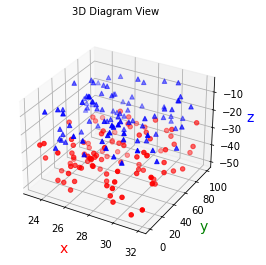

' 结果显示为：\n\n￼散点图\n\n总结\n\n本文主要是讲述使用 Python 第三方库 Matplotlib 来绘画 3D 图形，当然除了小编绘画的这些还有更多好看的图形，一个好的图形能给我们带来不一样的视觉享受，同时也可以帮助我们学到很多知识，做出很多有成就感的东西，但最关键的是思维，技术始终是实现一个产品或者目标的工具，我想这就是 Python 最具魔力的地方吧！大伙都实践起来呀~\n\n近期推荐阅读：\n\n【1】整理了我开始分享学习笔记到现在超过250篇优质文章，涵盖数据分析、爬虫、机器学习等方面，别再说不知道该从哪开始，实战哪里找了【2】【终篇】Pandas中文官方文档：基础用法6（含1-5)\n\n\n如果你觉得文章不错的话，分享、收藏、在看、留言666是对老表的最大支持。\n\n￼\n\n喜欢此内容的人还喜欢\n\n赠书5本，对比Excel，轻松学习Python报表自动化实战\n\n简说Python\n\n不喜欢\n\n不看的原因\n\n确定\n\n内容质量低\n\n \n\n不看此公众号\n\n【健康养生】金秋菊花开，稻熟蟹正肥！中医教您正确吃蟹\n\n中国中医\n\n不喜欢\n\n不看的原因\n\n确定\n\n内容质量低\n\n \n\n不看此公众号\n\n吵架时，忍不住用想激怒对方的女生，必看这一篇\n\nAyawawa\n\n不喜欢\n\n不看的原因\n\n确定\n\n内容质量低\n\n \n\n不看此公众号\n\n：，。视频小程序赞，轻点两下取消赞在看，轻点两下取消在看 '

In [6]:

""" 结果显示：

￼线性图

3D 散点图

绘制 3D 散点图的基本方法是：Axes3D.scatter(xs, ys[, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs])

参数详解：

参数描述xs一维数组，点的 x 轴坐标ys一维数组，点的 y 轴坐标zs一维数组，可选项，点的 z 轴坐标zdir可选项，在 3D 轴上绘制 2D 数据时，
数据必须以 xs，ys 的形式传递，若此时将 zdir 设置为 ‘y’，数据将会被绘制到 x-z 轴平面上，默认为 ‘z’s标量或数组类型，可选项，
标记的大小，默认 20c标记的颜色，可选项，可以是单个颜色或者一个颜色列表支持英文颜色名称及其简写、十六进制颜色码等，
更多颜色示例参见官网 Color Demodepthshadebool 值，可选项，默认 True，是否为散点标记着色以提供深度外观**kwargs其他关键字import matplotlib.pyplot as plt
 """
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def randrange(n, vmin, vmax):

    return (vmax - vmin) * np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_title('3D Diagram View', pad=15, fontsize='10')
ax.set_xlabel('x ', color='r', fontsize='14')
ax.set_ylabel('y ', color='g', fontsize='14')
ax.set_zlabel('z ', color='b', fontsize='14')

plt.show()

""" 结果显示为：

￼散点图

总结

本文主要是讲述使用 Python 第三方库 Matplotlib 来绘画 3D 图形，当然除了小编绘画的这些还有更多好看的图形，一个好的图形能给我们带来不一样的视觉享受，同时也可以帮助我们学到很多知识，做出很多有成就感的东西，但最关键的是思维，技术始终是实现一个产品或者目标的工具，我想这就是 Python 最具魔力的地方吧！大伙都实践起来呀~

近期推荐阅读：

【1】整理了我开始分享学习笔记到现在超过250篇优质文章，涵盖数据分析、爬虫、机器学习等方面，别再说不知道该从哪开始，实战哪里找了【2】【终篇】Pandas中文官方文档：基础用法6（含1-5)


如果你觉得文章不错的话，分享、收藏、在看、留言666是对老表的最大支持。

￼

喜欢此内容的人还喜欢

赠书5本，对比Excel，轻松学习Python报表自动化实战

简说Python

不喜欢

不看的原因

确定

内容质量低

 

不看此公众号

【健康养生】金秋菊花开，稻熟蟹正肥！中医教您正确吃蟹

中国中医

不喜欢

不看的原因

确定

内容质量低

 

不看此公众号

吵架时，忍不住用想激怒对方的女生，必看这一篇

Ayawawa

不喜欢

不看的原因

确定

内容质量低

 

不看此公众号

：，。视频小程序赞，轻点两下取消赞在看，轻点两下取消在看 """